## Data loading

### Subtask:
Load the "support2.csv" dataset.


In [2]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("joebeachcapital/support2")

print("Path to dataset files:", path)

# Search for the CSV file recursively
print("\nSearching for dataset files...")
found_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            found_files.append(file_path)
            print(f"Found CSV file: {file_path}")

if not found_files:
    print("\nNo CSV files found. Checking directory structure...")
    !ls -R {path}
else:
    print("\nYou can access the first CSV file with:")
    #print(f"pd.read_csv('{found_files[0]}')")
    path = found_files[0]

# Search for the CSV file recursively
print("\nSearching for dataset files...")
found_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            found_files.append(file_path)
            print(f"Found CSV file: {file_path}")

if not found_files:
    print("\nNo CSV files found. Checking directory structure...")
    !ls -R {path}
else:
    print("\nYou can access the first CSV file with:")
    #print(f"pd.read_csv('{found_files[0]}')
    path = found_files[0]


import pandas as pd

try:
    df = pd.read_csv(path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'SEER Breast Cancer Dataset .csv' not found. Please ensure the file is in the correct location.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Path to dataset files: /kaggle/input/support2

Searching for dataset files...
Found CSV file: /kaggle/input/support2/support2.csv

You can access the first CSV file with:

Searching for dataset files...

No CSV files found. Checking directory structure...
/kaggle/input/support2/support2.csv


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


(9105, 47)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

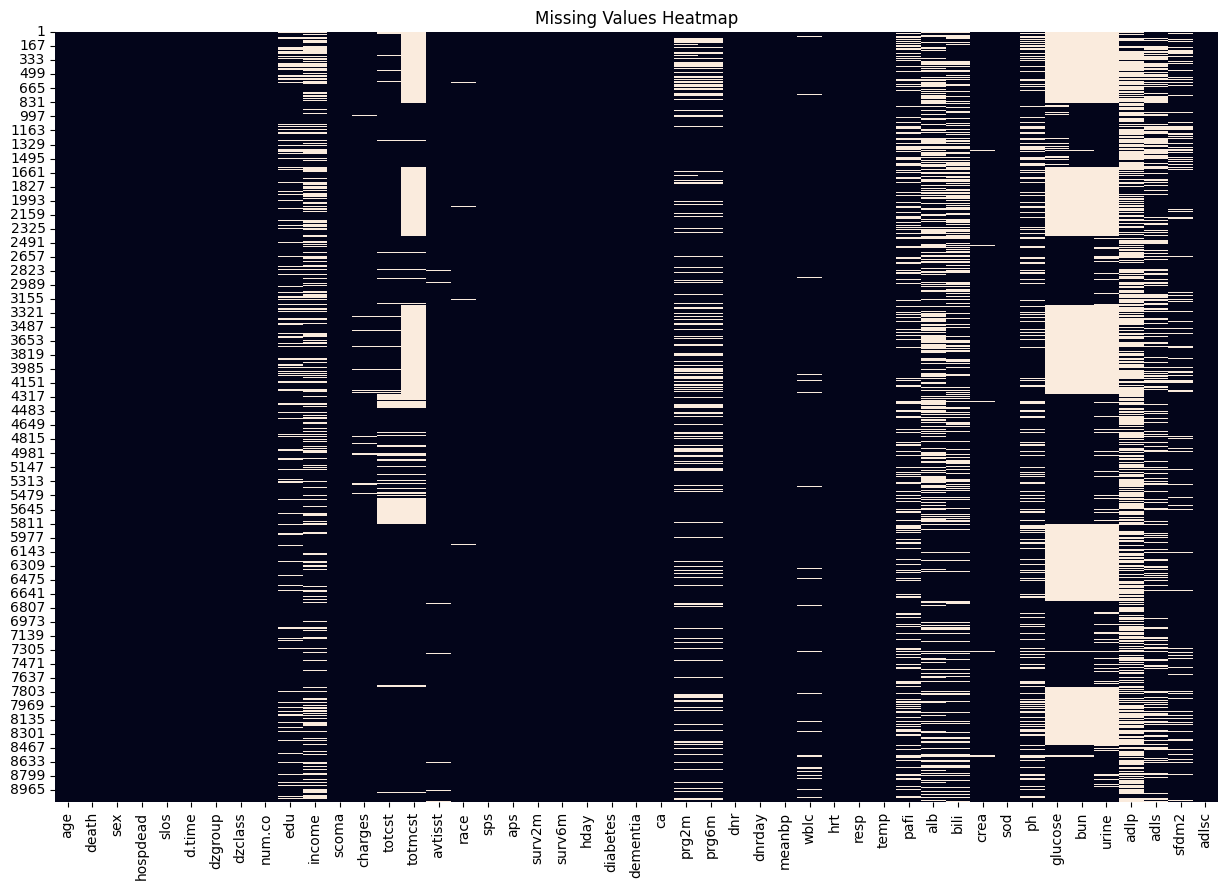

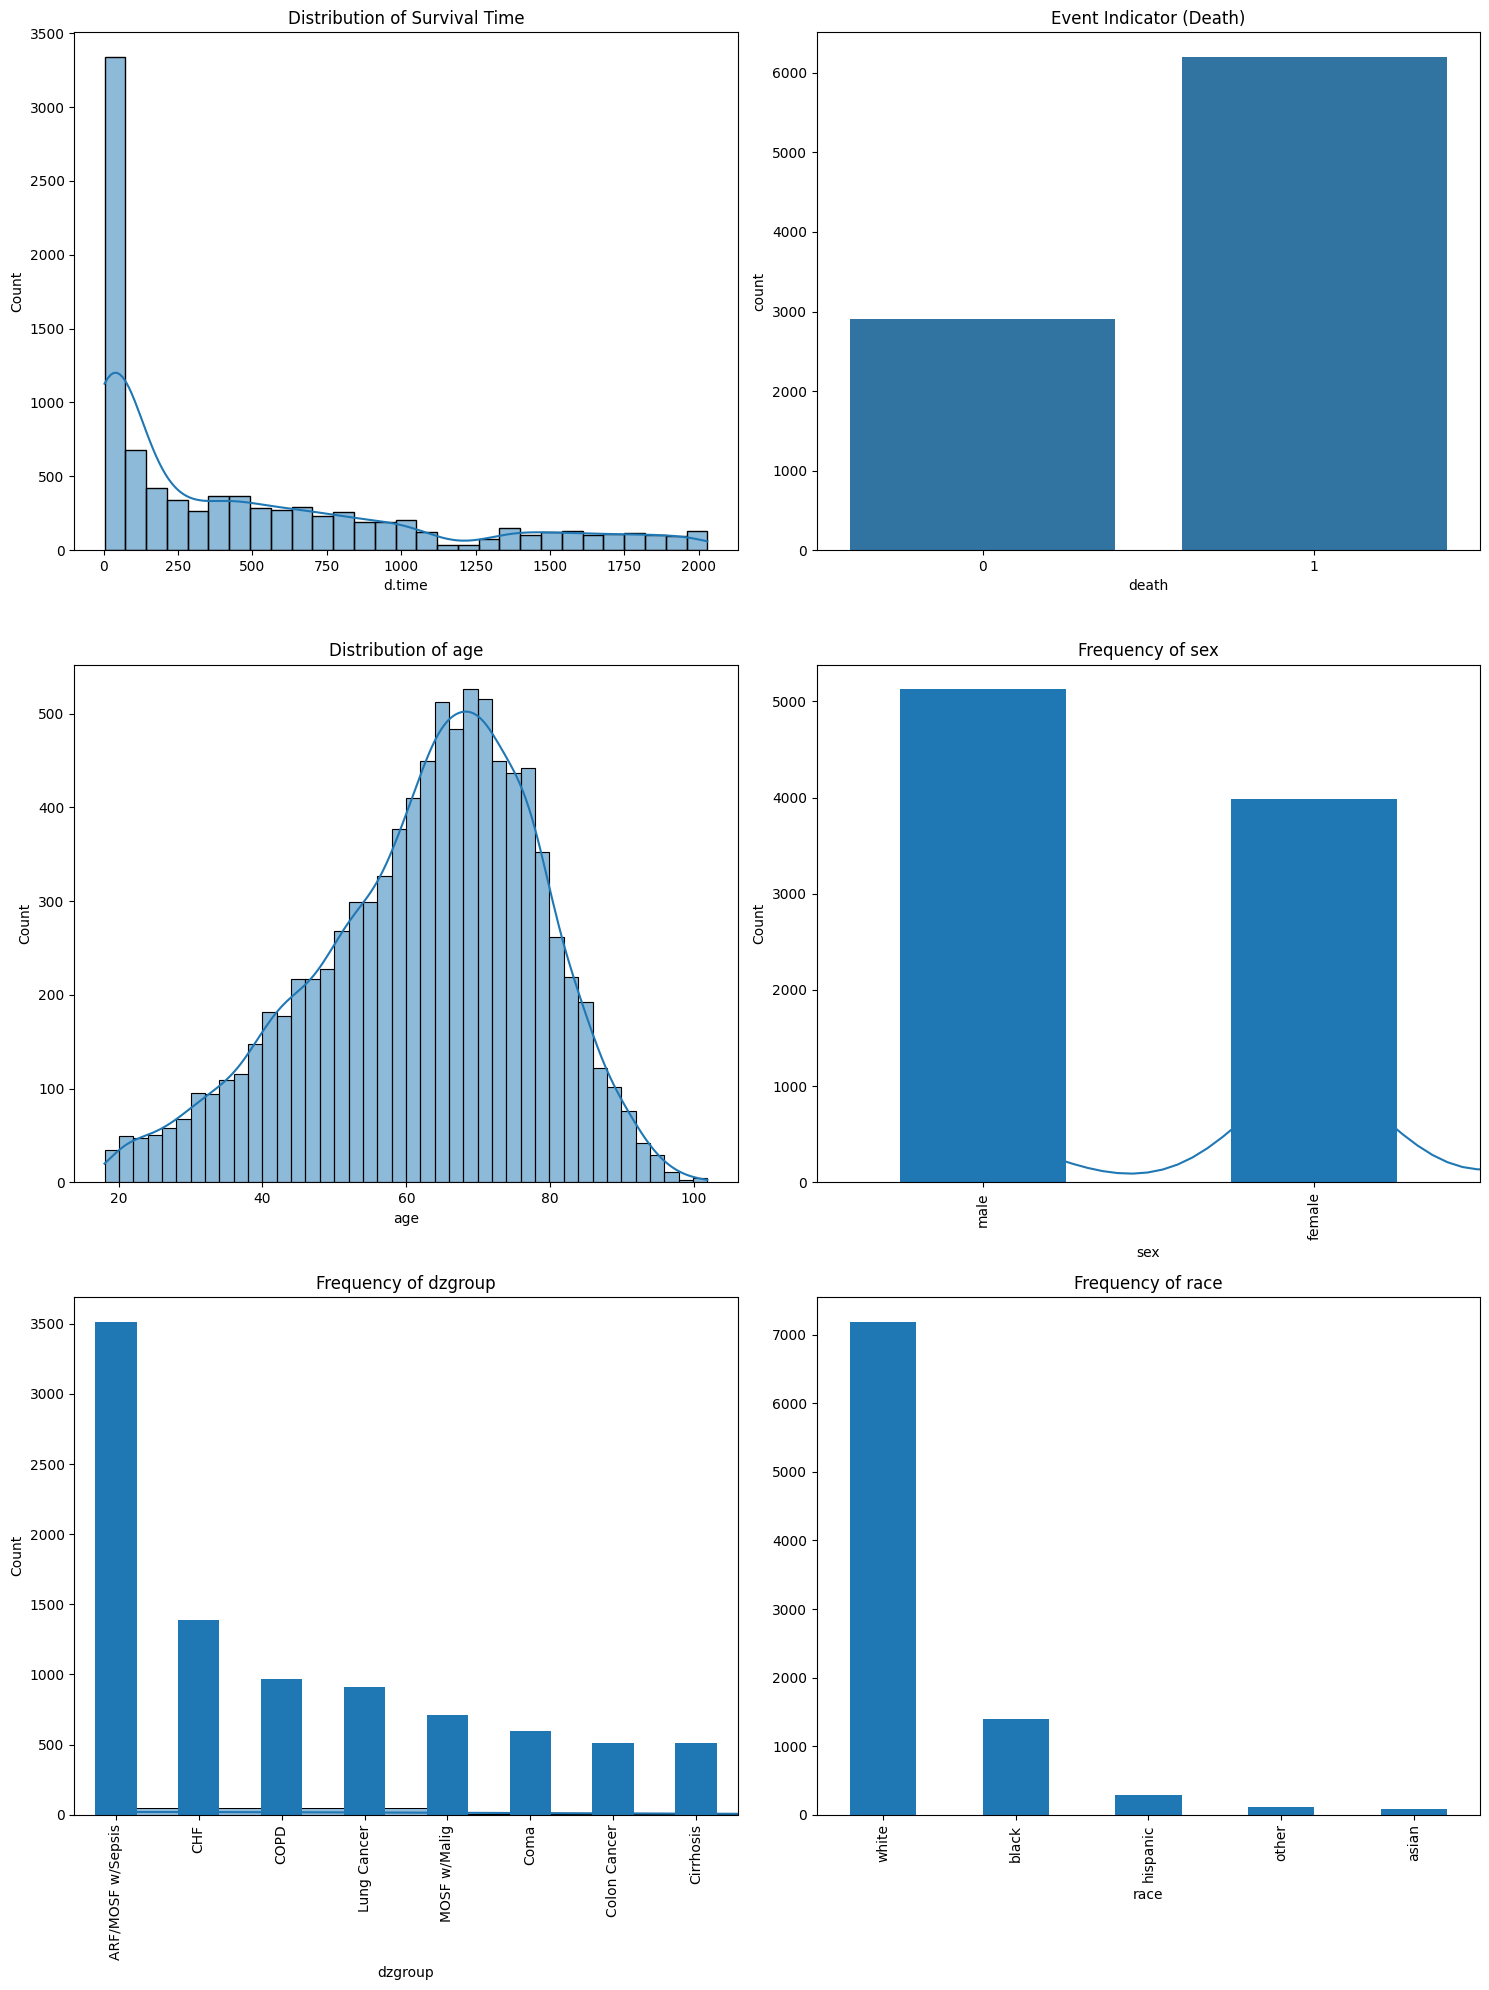

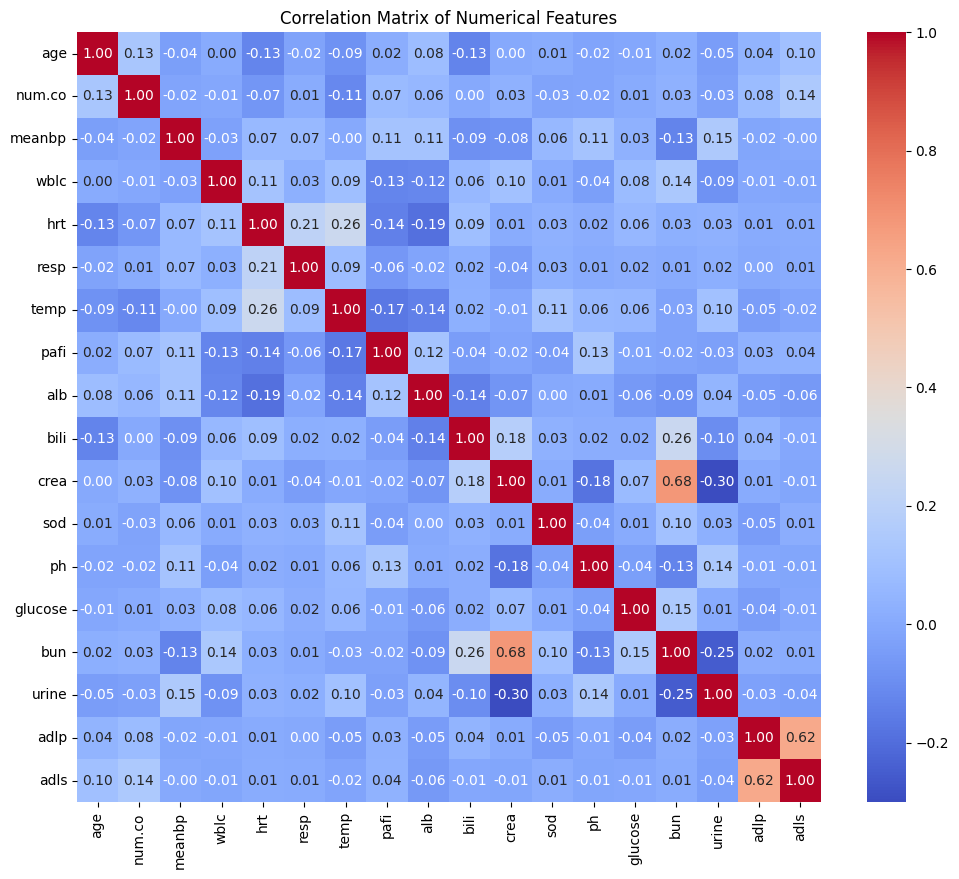

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

num_feats = ['age', 'num.co', 'meanbp', 'wblc', 'hrt', 'resp',
             'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
             'glucose', 'bun', 'urine', 'adlp', 'adls']
cat_feats = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca']

# Data Types and Summary Statistics
print(df.info())
print(df.describe())

# Missing Values
print(df.isnull().sum())

# Visualize missing values with a heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


# Distribution Analysis
plt.figure(figsize=(15, 20))

# Survival time
plt.subplot(3, 2, 1)
sns.histplot(df['d.time'], kde=True)
plt.title('Distribution of Survival Time')

# Event indicator
plt.subplot(3, 2, 2)
sns.countplot(x='death', data=df)
plt.title('Event Indicator (Death)')


# Example distributions for a few numerical features (adjust as needed)
num_feats_subset = ['age', 'num.co', 'meanbp']
for i, feat in enumerate(num_feats_subset):
    plt.subplot(3, 2, i + 3)
    sns.histplot(df[feat], kde=True)
    plt.title(f'Distribution of {feat}')

# Example distributions for a few categorical features (adjust as needed)
cat_feats_subset = ['sex', 'dzgroup', 'race']
for i, feat in enumerate(cat_feats_subset):
    plt.subplot(3, 2, i + 4)
    df[feat].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feat}')


plt.tight_layout()
plt.show()

# Correlation Analysis (Numerical Features)
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_feats].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

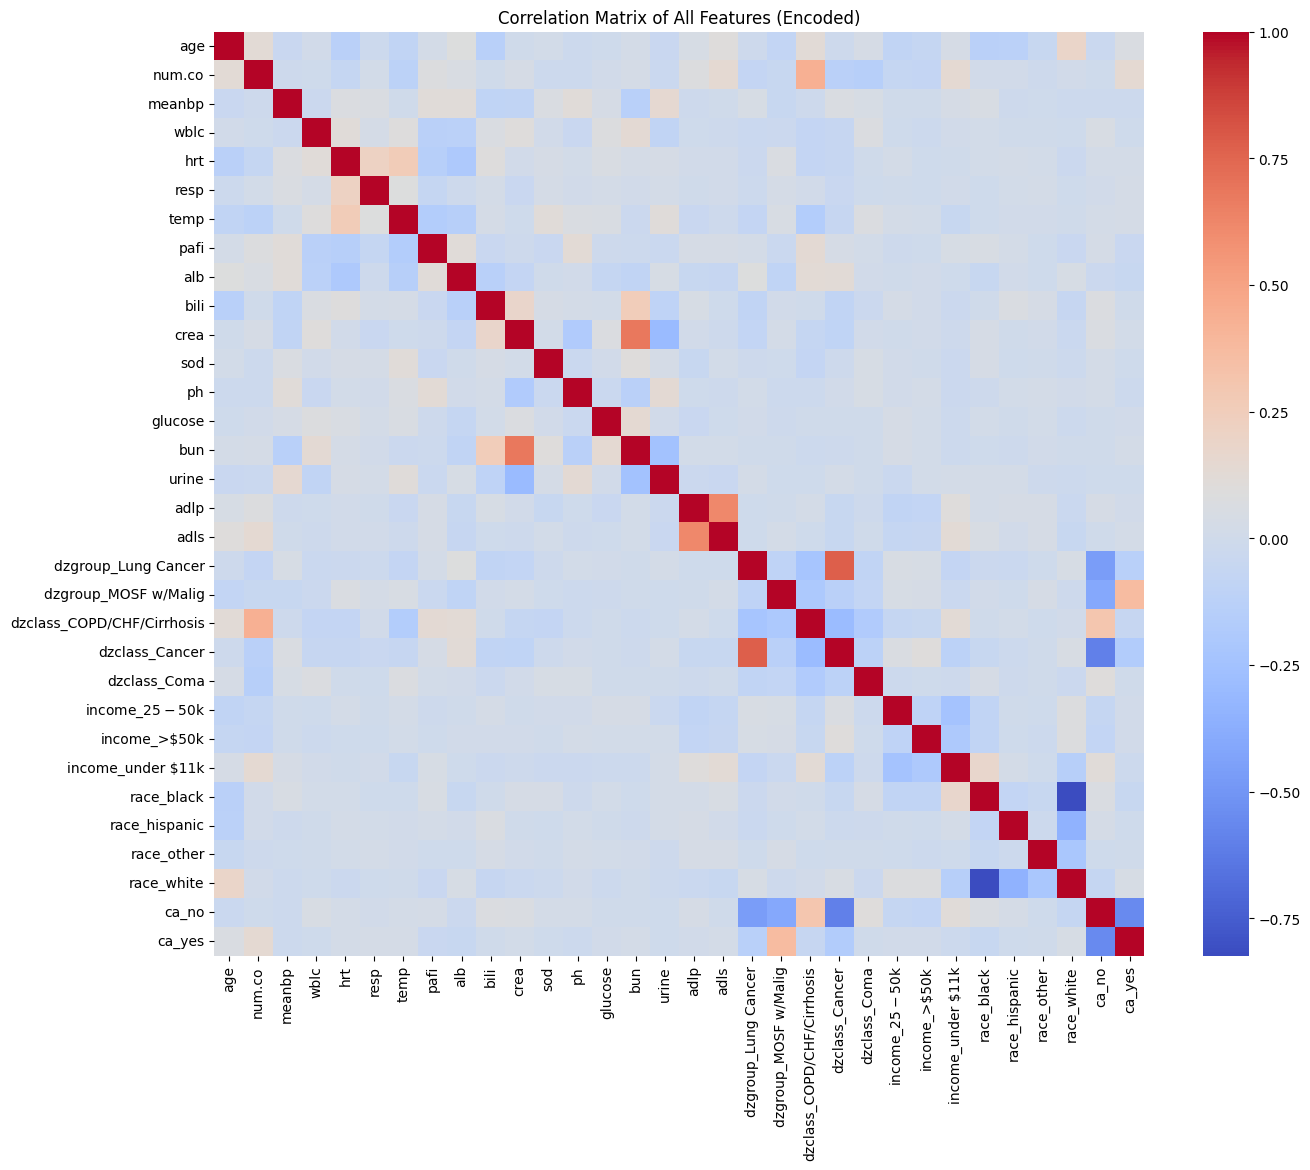

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, num_feats, and cat_feats are already defined

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df_encoded, columns=cat_feats, drop_first=True) # drop_first to avoid multicollinearity

# Combine numerical and encoded categorical features
all_feats_encoded = num_feats + list(df_encoded.columns[len(df.columns):]) # get encoded column names

# Calculate the correlation matrix
corr_matrix = df_encoded[all_feats_encoded].corr()

# Plotting the heatmap
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f") # annot=False to avoid cluttering
plt.title('Correlation Matrix of All Features (Encoded)')
plt.show()

## Data preparation

### Subtask:
Prepare the data for visualization by handling missing values and ensuring consistent data types.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming df, num_feats, and cat_feats are already defined from previous steps

# Create copies to avoid modifying the original DataFrame
df_tr = df.copy()

# Split the data
x_tr, x_te, y_tr, y_te = train_test_split(df.drop('death', axis=1), df['death'], test_size=0.2, random_state=1)
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.25, random_state=1)

# Impute missing numerical features using the mean (only on training data)
num_imputer = SimpleImputer(strategy='mean')
x_tr[num_feats] = num_imputer.fit_transform(x_tr[num_feats])
x_val[num_feats] = num_imputer.transform(x_val[num_feats])
x_te[num_feats] = num_imputer.transform(x_te[num_feats])

# Convert relevant columns to numeric, handling errors
for col in num_feats:
    x_tr[col] = pd.to_numeric(x_tr[col], errors='coerce')
    x_val[col] = pd.to_numeric(x_val[col], errors='coerce')
    x_te[col] = pd.to_numeric(x_te[col], errors='coerce')

# Concatenate the imputed data with the target variable
x_tr['death'] = y_tr
x_val['death'] = y_val
x_te['death'] = y_te

# Display the first few rows of the processed training data
display(x_tr.head())

,age,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,...,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc,death
6978,35.63599,male,0,28,919,ARF/MOSF w/Sepsis,ARF/MOSF,2.0,14.0,NaN,...,144.0,7.479492,135.000000,39.000000,4320.000000,1.142159,0.00000,no(M2 and SIP pres),0.000000,0
5393,80.86499,female,1,19,19,ARF/MOSF w/Sepsis,ARF/MOSF,0.0,NaN,under $11k,...,140.0,7.469727,129.000000,101.000000,0.000000,1.142159,0.00000,<2 mo. follow-up,0.000000,1
8023,71.72095,female,0,11,1734,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,12.0,NaN,...,137.0,7.409180,158.811183,32.048103,2197.112137,1.142159,2.00000,no(M2 and SIP pres),2.000000,0
7701,71.34296,male,0,13,386,COPD,COPD/CHF/Cirrhosis,2.0,10.0,under $11k,...,136.0,7.389648,158.000000,21.000000,2197.112137,0.000000,1.66577,no(M2 and SIP pres),0.494751,0
4277,77.40698,male,1,7,7,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.0,NaN,...,137.0,7.329102,158.811183,32.048103,2197.112137,1.142159,6.00000,<2 mo. follow-up,6.000000,1


## Data visualization

### Subtask:
Generate visualizations to explore the relationship between survival and various features in the SUPPORT dataset.


In [6]:
print(x_tr['d.time'].unique())

[ 919   19 1734 ...  246 1895 1992]


In [7]:
# Inspect the 'd.time' column for non-numeric values
print(x_tr['d.time'].unique())
print(x_tr['d.time'].dtype)
print(x_tr.info())

# Try to identify the rows causing the error
for index, row in x_tr.iterrows():
  try:
    float(row['d.time'])
  except (ValueError, TypeError):
    print(f"Error converting value at index {index}: {row['d.time']}")
    print(row)

[ 919   19 1734 ...  246 1895 1992]
int64
<class 'pandas.core.frame.DataFrame'>
Index: 5463 entries, 6978 to 4634
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5463 non-null   float64
 1   sex       5463 non-null   object 
 2   hospdead  5463 non-null   int64  
 3   slos      5463 non-null   int64  
 4   d.time    5463 non-null   int64  
 5   dzgroup   5463 non-null   object 
 6   dzclass   5463 non-null   object 
 7   num.co    5463 non-null   float64
 8   edu       4474 non-null   float64
 9   income    3663 non-null   object 
 10  scoma     5463 non-null   float64
 11  charges   5358 non-null   float64
 12  totcst    4904 non-null   float64
 13  totmcst   3350 non-null   float64
 14  avtisst   5418 non-null   float64
 15  race      5439 non-null   object 
 16  sps       5463 non-null   float64
 17  aps       5463 non-null   float64
 18  surv2m    5463 non-null   float64
 19  surv6m    5463 non-null   flo

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c7ee73f4a2601088b2020bc69f56868cb5135ca9995c5a4dd5b88c11968c644f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


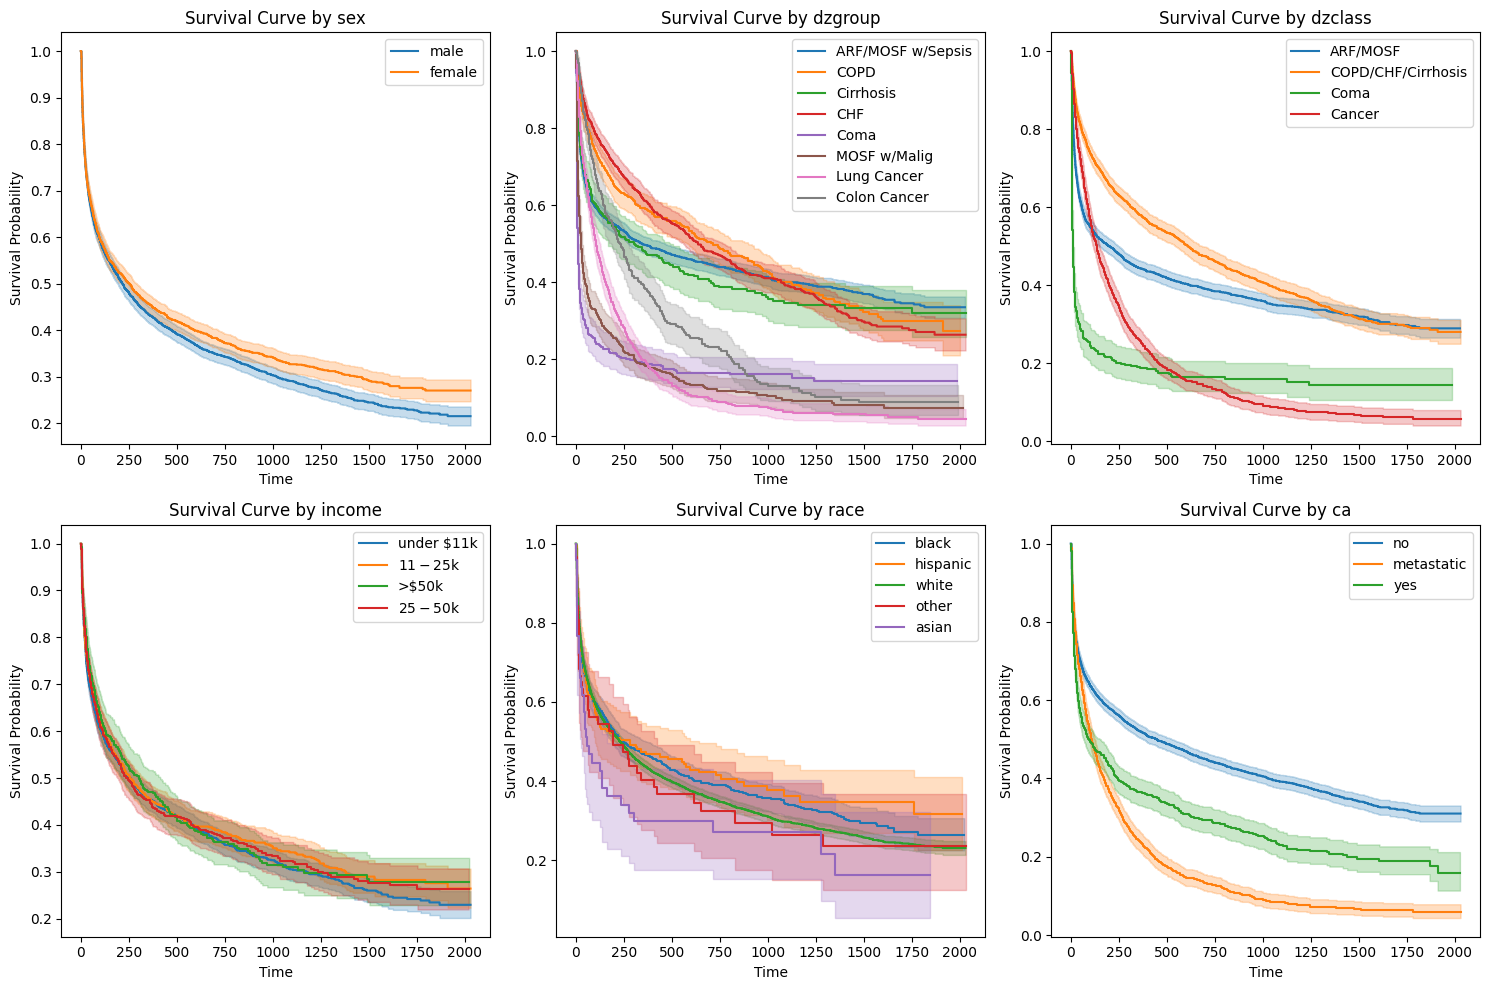

In [ ]:
!pip install lifelines
# Convert 'd.time' to float64
x_tr['d.time'] = x_tr['d.time'].astype('float64')

import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# 1. Survival Curves by Categorical Features
plt.figure(figsize=(15, 10))
kmf = KaplanMeierFitter()
for i, cat_feat in enumerate(cat_feats):
    plt.subplot(2, 3, i + 1)
    for cat in x_tr[cat_feat].unique():
        ix = x_tr[cat_feat] == cat
        # Check if the data for this category is empty before fitting the model
        if x_tr.loc[ix, 'd.time'].size > 0:
            kmf.fit(x_tr.loc[ix, 'd.time'], event_observed=x_tr.loc[ix, 'death'])
            kmf.plot(label=cat)
        else:
            print(f"Warning: No data for category '{cat}' in feature '{cat_feat}'. Skipping.")
    plt.title(f'Survival Curve by {cat_feat}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend()

plt.tight_layout()
plt.show()

# 2. Distributions of Numerical Features by Survival Status
plt.figure(figsize=(15, 10))
for i, num_feat in enumerate(num_feats):
    plt.subplot(4, 5, i + 1)
    # Melt the data to long-form for using hue
    melted_data = x_tr[[num_feat, 'death']].melt(id_vars=['death'], value_name='value')  # Change value_name
    sns.histplot(data=melted_data, x='value', hue='death', kde=True)  # Change x to 'value'
    plt.title(f'Distribution of {num_feat} by Survival')
    plt.xlabel(num_feat)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
